<a href="https://colab.research.google.com/github/ReidelVichot/DEFreightProfiles/blob/main/Truck_Volume_6-21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import CCD from google drive Source: Census
ccd_name = "/content/drive/My Drive/FreightProfiles/tl_rd22_10_cousub (1)/tl_rd22_10_cousub.shp"
ccd =  gpd.read_file(ccd_name)
ccd = ccd.to_crs("EPSG:2235")
# Import tracks from google drive
# Source: Fist Maps
# https://de-firstmap-delaware.hub.arcgis.com/datasets/railroad-rail-lines/explore?location=39.655622%2C-75.765561%2C13.56
rail_name = "/content/drive/MyDrive/FreightProfiles/Delaware_Multimodal_2.0_tracks/Delaware_Multimodal_2.0.shp"
rail = gpd.read_file(rail_name)
rail = rail.to_crs("EPSG:2235")
cols = ['NAME','geometry']
ccd = ccd[cols]
cols = ['TRACK_TYPE', 'STATUS', 'LINE_ID', 'OWNER', 'geometry']
rail = rail[cols]

In [4]:
taz_name = "/content/drive/MyDrive/temp_dstep23/TAZ_analysis/DE_TAZ_2021_TRKGEN_region.shp"
taz = gpd.read_file(taz_name)
taz = taz.to_crs("EPSG:2235")

In [5]:
taz["FIS"] = taz['TRN_UTL_20'] + taz['LE_HOSP_20'] + taz['CONS_20'] + taz['MANU_20']
taz["SIS"] = taz['OT_SVCS_20'] + taz['ED_HEALTH_'] + taz['FINANCE_20'] + taz['PRO_BUS_20'] + taz['LE_HOSP_20'] + taz['INFO_20']
taz["FIS_per"] = taz["FIS"]/taz['TOT_20']*100
taz_grpd = taz.groupby("CCD").sum(numeric_only = True)
taz_grpd["FIS_per"] = taz_grpd["FIS"]/taz_grpd["TOT_20"]*100
taz_grpd["FIS_capita"] = taz_grpd["FIS"]/taz_grpd["POP_20"]
taz_grpd.reset_index(inplace=True)
taz_grpd.at[ 9, "CCD"] = "Lower Christiana"
taz_grpd.at[25, "CCD"] = "Upper Christiana"
taz_grpd.at[12, "CCD"] = "Middletown-Odessa"
taz_grpd.at[20, "CCD"] = "Pike Creek-Central Kirkwood"
ccd = ccd.merge(taz_grpd, left_on="NAME", right_on="CCD")

In [6]:
CFC = gpd.read_file("/content/drive/MyDrive/FreightProfiles/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0 (1)/Delaware_Freight_Corridors_-_FAST_Act_Critical_2.0.shp")
CFC = CFC.to_crs("EPSG:2235")

In [7]:
CFC['FREIGHT_NE'].unique()

array(['CUFC', 'CRFC', 'PFN'], dtype=object)

In [ ]:
CoastalCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/CoastalCorridor/Delaware_Multimodal_2.0.shp")
CoastalCorridor = CoastalCorridor.to_crs("EPSG:2235")

MetroCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/MetroCorridor/Delaware_Multimodal_2.0.shp")
MetroCorridor = MetroCorridor.to_crs("EPSG:2235")

LewesCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/LewesCorridor/Delaware_Multimodal_2.0.shp")
LewesCorridor = LewesCorridor.to_crs("EPSG:2235")

BayCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/BayCorridor/Delaware_Multimodal_2.0.shp")
BayCorridor = BayCorridor.to_crs("EPSG:2235")

PiedmontCorridor = gpd.read_file("/content/drive/MyDrive/FreightProfiles/PiedmontCorridor/Delaware_Multimodal_2.0.shp")
PiedmontCorridor = PiedmontCorridor.to_crs("EPSG:2235")

In [8]:
truck_traffic = pd.read_csv("/content/drive/MyDrive/FreightProfiles/StreetLight/1669875_All_CCDsAvailable_trucks_2020/1669875_All_CCDsAvailable_trucks_2020/1669875_All_CCDsAvailable_trucks_2020_odg_comm.csv")

In [9]:
cols = ['Vehicle Weight', 'Origin Zone ID', 'Origin Zone Name',
        'Origin Zone Source', 'Destination Zone ID', 'Destination Zone Name',
        'Destination Zone Source', 'Day Type', 'Day Part',
        'Average Daily O-D Traffic (StL Index)',
        'Average Daily Origin Zone Traffic (StL Index)',
       'Average Daily Destination Zone Traffic (StL Index)',
       'Avg Travel Time (sec)']

In [10]:
truck_traffic = truck_traffic[cols]

In [11]:
ccd["NAME"].values

array(['Lewes', 'Millsboro', 'Central Kent', 'Smyrna',
       'Middletown-Odessa', 'New Castle', 'Pike Creek-Central Kirkwood',
       'Wilmington', 'Lower Christiana', 'Piedmont', 'Upper Christiana',
       'Georgetown', 'Milford South', 'Seaford', 'Selbyville-Frankford',
       'Laurel-Delmar', 'Milton', 'Bridgeville-Greenwood', 'Dover',
       'Kenton', 'Felton', 'Milford North', 'Harrington', 'Brandywine',
       'Glasgow', 'Red Lion', 'Newark'], dtype=object)

In [13]:
truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()

<ipython-input-13-676d64de8ec0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  truck_traffic2 = truck_traffic[truck_traffic["Day Type"]=="0: All Days (M-Su)"][truck_traffic['Day Part']=="00: All Day (12am-12am)"].groupby("Destination Zone Name").sum(numeric_only=True).reset_index()


In [15]:
truck_traffic

,Vehicle Weight,Origin Zone ID,Origin Zone Name,Origin Zone Source,Destination Zone ID,Destination Zone Name,Destination Zone Source,Day Type,Day Part,Average Daily O-D Traffic (StL Index),Average Daily Origin Zone Traffic (StL Index),Average Daily Destination Zone Traffic (StL Index),Avg Travel Time (sec)
0,Medium,1.000390e+09,Brandywine,Input,NaN,'090010112002',Census Block Group,0: All Days (M-Su),00: All Day (12am-12am),2,81455.0,NaN,11349.0
1,Medium,1.000390e+09,Brandywine,Input,NaN,'090010112002',Census Block Group,0: All Days (M-Su),02: 1am (1am-2am),0,284.0,NaN,10994.0
2,Medium,1.000390e+09,Brandywine,Input,NaN,'090010112002',Census Block Group,0: All Days (M-Su),05: 4am (4am-5am),1,960.0,NaN,9630.0
3,Medium,1.000390e+09,Brandywine,Input,NaN,'090010112002',Census Block Group,0: All Days (M-Su),14: 1pm (1pm-2pm),0,7232.0,NaN,14879.0
4,Medium,1.000390e+09,Brandywine,Input,NaN,'090010112002',Census Block Group,0: All Days (M-Su),15: 2pm (2pm-3pm),0,7509.0,NaN,12521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443239,Heavy,NaN,'541070009011',Census Block Group,1.000391e+09,Glasgow,Input,1: Weekday (M-Th),13: 12pm (12noon-1pm),2,NaN,1636.0,25201.0
1443240,Heavy,NaN,'541070109013',Census Block Group,1.000392e+09,Lower Christiana,Input,0: All Days (M-Su),00: All Day (12am-12am),1,NaN,9049.0,23330.0
1443241,Heavy,NaN,'541070109013',Census Block Group,1.000392e+09,Lower Christiana,Input,0: All Days (M-Su),03: 2am (2am-3am),1,NaN,101.0,23330.0
1443242,Heavy,NaN,'541070109013',Census Block Group,1.000392e+09,Lower Christiana,Input,1: Weekday (M-Th),00: All Day (12am-12am),2,NaN,12161.0,23330.0


In [16]:
truck_traffic_ccd = truck_traffic2[truck_traffic2["Destination Zone Name"].isin(ccd["NAME"].values)][['Destination Zone Name', 'Average Daily O-D Traffic (StL Index)']]

In [17]:
truck_traffic_ccd

,Destination Zone Name,Average Daily O-D Traffic (StL Index)
14977,Brandywine,124772
14978,Glasgow,47339
14979,Lower Christiana,66621
14980,Middletown-Odessa,97381
14981,New Castle,271318
14982,Newark,89553
14983,Piedmont,31267
14984,Pike Creek-Central Kirkwood,33972
14985,Red Lion,45248
14986,Upper Christiana,74421


In [18]:
ccd  = ccd.merge(truck_traffic_ccd, left_on="CCD", right_on="Destination Zone Name")

In [20]:
ccd["z-score"] = (ccd["Average Daily O-D Traffic (StL Index)"] - ccd["Average Daily O-D Traffic (StL Index)"].mean())/ccd["Average Daily O-D Traffic (StL Index)"].std()

In [49]:
ccd[ccd["NAME"] == "New Castle"]["z-score"].values[0].round(2)

2.46

In [ ]:
ccd["z-score"] =

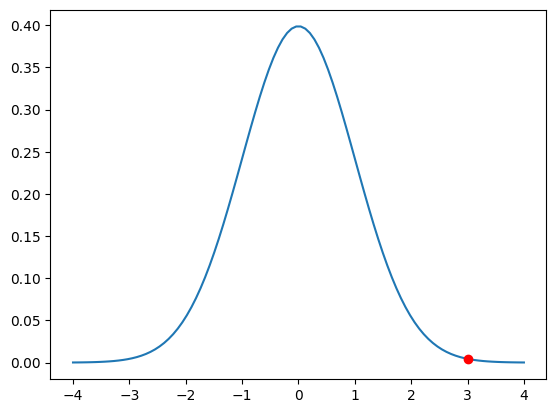

In [43]:
# prompt: plot a bell curve
# Define the x-axis values
x = np.linspace(-4, 4, 100)
# Define the y-axis values using the normal distribution function
y = np.exp(-x**2/2)/(np.sqrt(2*np.pi))
# Create the plot
plt.plot(x, y)

z=3

# Add a dot on the bell curve at x = z
plt.plot(z, np.exp(-z**2/2)/(np.sqrt(2*np.pi)), marker="o", color="red")

# Show the plot
plt.show()


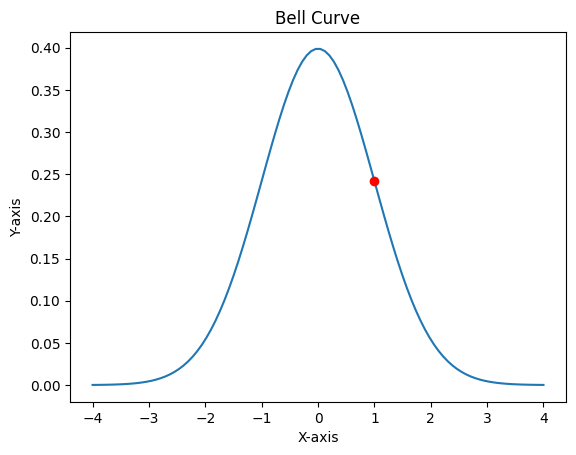

In [36]:
# prompt: plot a dot on the bell curve at the x of 1

# Define the x-axis values
x = np.linspace(-4, 4, 100)

# Define the y-axis values using the normal distribution function
y = np.exp(-x**2 / 2) / (np.sqrt(2 * np.pi))

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Bell Curve")

# Add a dot on the bell curve at x = 1
plt.plot(1, np.exp(-1**2 / 2) / (np.sqrt(2 * np.pi)), marker="o", color="red")

# Show the plot
plt.show()


<Axes: xlabel='POP_20', ylabel='Average Daily O-D Traffic (StL Index)'>

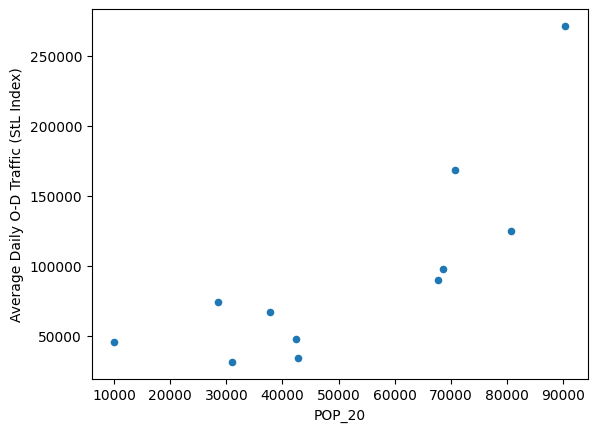

In [ ]:
ccd.plot(x="POP_20",y="Average Daily O-D Traffic (StL Index)", kind="scatter")

<Axes: xlabel='FIS_capita', ylabel='Average Daily O-D Traffic (StL Index)'>

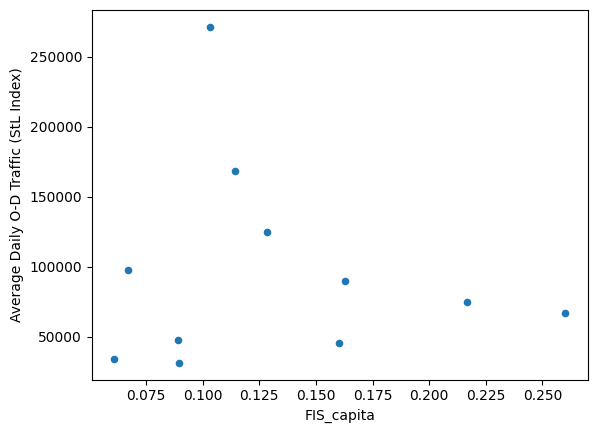

In [ ]:
ccd.plot(x="FIS_capita",y="Average Daily O-D Traffic (StL Index)", kind="scatter")

In [ ]:
ccd.columns

Index(['NAME', 'geometry', 'CCD', 'POP_20', 'TOT_Units_', 'Occ_HH_20',
       'Vacant_20', 'Tot_GC_20', 'TOT_Inst_2', 'TOT_nonins', 'NATRES_20',
       'CONS_20', 'MANU_20', 'WHL_RET_20', 'TRN_UTL_20', 'INFO_20',
       'FINANCE_20', 'PRO_BUS_20', 'ED_HEALTH_', 'LE_HOSP_20', 'OT_SVCS_20',
       'PUBADM_20', 'FOOD_SVC_2', 'FIS_20', 'TOT_20', 'EMP_19', 'Adj_EMP_20',
       'FIS', 'SIS', 'FIS_per', 'FIS_capita', 'Destination Zone Name',
       'Average Daily O-D Traffic (StL Index)'],
      dtype='object')

In [ ]:
gpd.overlay(CFC, ccd, how="intersection").length
gpd.overlay(PiedmontCorridor, ccd, how="intersection").length
gpd.overlay(CoastalCorridor, ccd, how="intersection").length
gpd.overlay(MetroCorridor, ccd, how="intersection").length
gpd.overlay(LewesCorridor, ccd, how="intersection").length
gpd.overlay(BayCorridor, ccd, how="intersection").length

0    59204.299611
1    24259.128666
dtype: float64

In [ ]:
CFC_ccd = gpd.overlay(CFC, ccd, how="intersection")
CFC_ccd["length_CFC"] = CFC_ccd.length
CFC_ccd = CFC_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_CFC"]]

In [ ]:
PiedmontCorridor_ccd = gpd.overlay(PiedmontCorridor, ccd, how="intersection", keep_geom_type=True)
PiedmontCorridor_ccd["length_Piedmont"] = PiedmontCorridor_ccd.length
PiedmontCorridor_ccd = PiedmontCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Piedmont"]]

In [ ]:
CoastalCorridor_ccd = gpd.overlay(CoastalCorridor, ccd, how="intersection", keep_geom_type=True)
CoastalCorridor_ccd["length_Coastal"] = CoastalCorridor_ccd.length
CoastalCorridor_ccd = CoastalCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Coastal"]]

In [ ]:
MetroCorridor_ccd = gpd.overlay(MetroCorridor, ccd, how="intersection", keep_geom_type=True)
MetroCorridor_ccd["length_Metro"] = MetroCorridor_ccd.length
MetroCorridor_ccd = MetroCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Metro"]]

In [ ]:
LewesCorridor_ccd = gpd.overlay(LewesCorridor, ccd, how="intersection", keep_geom_type=True)
LewesCorridor_ccd["length_Lewes"] = LewesCorridor_ccd.length
LewesCorridor_ccd = LewesCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Lewes"]]

In [ ]:
BayCorridor_ccd = gpd.overlay(BayCorridor, ccd, how="intersection", keep_geom_type=True)
BayCorridor_ccd["length_Bay"] = BayCorridor_ccd.length
BayCorridor_ccd = BayCorridor_ccd.groupby("NAME").sum(numeric_only=True).reset_index()[["NAME","length_Bay"]]

In [ ]:
ccd = ccd.merge(CFC_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(PiedmontCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(CoastalCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(MetroCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(LewesCorridor_ccd, left_on="CCD", right_on="NAME", how="outer")
ccd = ccd.merge(BayCorridor_ccd, left_on="CCD", right_on="NAME", how="outer").fillna(0)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1569: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAME_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1569: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAME_x'} in the result is deprecated and will raise a MergeError in a future version.
  result = DataFrame.merge(self, *args, **kwargs)


In [ ]:
ccd["freight_length"] = ccd["length_Piedmont"] + ccd["length_Coastal"] + ccd["length_Metro"] + ccd["length_Lewes"] + ccd["length_Bay"]

In [ ]:
ccd = ccd.drop(columns=["NAME", "NAME_x", "NAME_y"])

In [ ]:
rail_ccd = gpd.overlay(rail, ccd, how="intersection", keep_geom_type=True)
rail_ccd["rail_length"] = rail_ccd.length
rail_ccd = rail_ccd.groupby("CCD").sum(numeric_only=True).reset_index()[["CCD","rail_length"]]

In [ ]:
ccd = ccd.merge(rail_ccd, left_on="CCD", right_on="CCD", how="outer").fillna(0)

In [ ]:
ccd.columns = ['geometry', 'CCD', 'POP_20', 'TOT_Units_', 'Occ_HH_20', 'Vacant_20',
       'Tot_GC_20', 'TOT_Inst_2', 'TOT_nonins', 'NATRES_20', 'CONS_20',
       'MANU_20', 'WHL_RET_20', 'TRN_UTL_20', 'INFO_20', 'FINANCE_20',
       'PRO_BUS_20', 'ED_HEALTH_', 'LE_HOSP_20', 'OT_SVCS_20', 'PUBADM_20',
       'FOOD_SVC_2', 'FIS_20', 'TOT_20', 'EMP_19', 'Adj_EMP_20', 'FIS', 'SIS',
       'FIS_per', 'FIS_capita', 'Destination Zone Name',
       'StL_Index', 'length_CFC',
       'length_Piedmont', 'length_Coastal', 'length_Metro', 'length_Lewes',
       'length_Bay', 'freight_length', 'rail_length']

In [ ]:
# -- import statmodels using the formula api
import statsmodels.formula.api as sm

In [ ]:
# -- first build the model
model = sm.ols("StL_Index ~ TOT_Units_ + FIS", data=ccd)

# -- now fit the model to the data
result = model.fit()

In [ ]:
# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              StL_Index   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     7.178
Date:                Thu, 25 Jan 2024   Prob (F-statistic):             0.0164
Time:                        20:31:50   Log-Likelihood:                -132.39
No. Observations:                  11   AIC:                             270.8
Df Residuals:                       8   BIC:                             272.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.732e+04   3.42e+04     -0.506      0.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# -- first build the model
model = sm.ols("StL_Index ~ POP_20 + Adj_EMP_20 + CONS_20 + MANU_20 + WHL_RET_20 + TRN_UTL_20 + FIS_20", data=ccd)

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              StL_Index   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3.650
Date:                Thu, 25 Jan 2024   Prob (F-statistic):              0.158
Time:                        20:31:50   Log-Likelihood:                -125.65
No. Observations:                  11   AIC:                             267.3
Df Residuals:                       3   BIC:                             270.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.811e+04    3.6e+04     -0.504      0.6

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
ccd.describe()

,POP_20,TOT_Units_,Occ_HH_20,Vacant_20,Tot_GC_20,TOT_Inst_2,TOT_nonins,NATRES_20,CONS_20,MANU_20,...,FIS_capita,StL_Index,length_CFC,length_Piedmont,length_Coastal,length_Metro,length_Lewes,length_Bay,freight_length,rail_length
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000
mean,51883.545455,21249.727273,19961.000000,1288.727273,1445.363636,577.090909,868.272727,27.272727,1386.818182,1635.454545,...,0.132037,95483.454545,49220.555252,10924.546019,26877.657096,28461.009759,0.0,7587.584389,73850.797262,156078.512705
std,25127.227998,10869.374003,10000.152199,1166.797677,2257.073693,667.357544,2206.701026,35.908469,960.839302,1570.712409,...,0.062759,71526.611777,53396.696948,12647.521028,59841.353712,38324.122544,0.0,18602.066043,84278.191417,87860.011857
min,10061.000000,3548.000000,3423.000000,125.000000,62.000000,0.000000,32.000000,0.000000,253.000000,194.000000,...,0.061010,31267.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,5566.094098,16763.727469
25%,34334.500000,14083.500000,13456.000000,534.500000,131.000000,73.500000,57.500000,6.000000,650.500000,439.500000,...,0.089315,46293.500000,9861.949990,0.000000,0.000000,0.000000,0.0,0.000000,22133.087589,94311.206437
50%,42813.000000,18310.000000,17596.000000,839.000000,618.000000,274.000000,108.000000,14.000000,1290.000000,1129.000000,...,0.114161,74421.000000,25139.558117,5566.094098,0.000000,14345.591737,0.0,0.000000,32704.587792,140201.774798
75%,69708.500000,30535.500000,27155.000000,1698.000000,1682.000000,781.500000,407.000000,33.000000,1850.000000,1940.000000,...,0.161605,111076.500000,81985.823918,21068.825115,19865.116154,38180.654226,0.0,0.000000,80030.722507,237464.234614
max,90410.000000,36383.000000,34665.000000,3901.000000,7769.000000,1865.000000,7495.000000,123.000000,2989.000000,4702.000000,...,0.260151,271318.000000,142284.875030,32185.299743,198278.687068,122855.827195,0.0,59204.299611,257482.986679,276297.594694


In [ ]:
# -- first build the model
model = sm.ols("StL_Index ~ POP_20 + FIS", data=ccd)

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:              StL_Index   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     7.012
Date:                Thu, 25 Jan 2024   Prob (F-statistic):             0.0174
Time:                        20:31:50   Log-Likelihood:                -132.47
No. Observations:                  11   AIC:                             270.9
Df Residuals:                       8   BIC:                             272.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.468e+04   3.58e+04     -0.689      0.5

In [ ]:
ccd["area"] = ccd.area * 3.58701e-8

In [ ]:
ccd["StL_Index_dens"] = ccd["StL_Index"] / ccd["area"]

In [ ]:
# -- first build the model
model = sm.ols("StL_Index_dens ~ POP_20 + Adj_EMP_20 + CONS_20 + MANU_20 + WHL_RET_20 + TRN_UTL_20 + FIS_20", data=ccd)

# -- now fit the model to the data
result = model.fit()

# -- summarize the model fit
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         StL_Index_dens   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     8.869
Date:                Thu, 25 Jan 2024   Prob (F-statistic):             0.0501
Time:                        20:44:13   Log-Likelihood:                -85.697
No. Observations:                  11   AIC:                             187.4
Df Residuals:                       3   BIC:                             190.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1122.7990    951.701      1.180      0.3

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
